In [ ]:
%matplotlib inline

In [8]:
import tensorflow as tf
from model_trainer import get_model
from adipose_models import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_f = hr_5_3_0
savedfile_name = 'hr_5_3_0'
target_epoch = 35

In [3]:
target_model = get_model(model_f)
target_model.load_weights(f'savedmodels/{savedfile_name}/{target_epoch}')

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
HR_0 (HighResolutionModule)     [(None, 200, 200, 8) 3760        input_1[0][0]                    
__________________________________________________________________________________________________
HR_1 (HighResolutionModule)     [(None, 200, 200, 8) 19336       HR_0[0][0]                       
__________________________________________________________________________________________________
HR_2 (HighResolutionModule)     [(None, 200, 200, 8) 93088       HR_1[0][0]                       
                                                                 HR_1[0][1]            

In [6]:
with np.load('cell_mask_data.npz') as data:
    X = data['img']
    Y = data['mask']
print('X shape: ', X.shape, X.dtype)
print('Y shape: ', Y.shape, Y.dtype)

X shape:  (1533, 200, 200, 3) uint8
Y shape:  (1533, 200, 200) float32


In [9]:
X_sample = X[:6]
Y_sample = Y[:6]
predict = target_model.predict(X_sample)

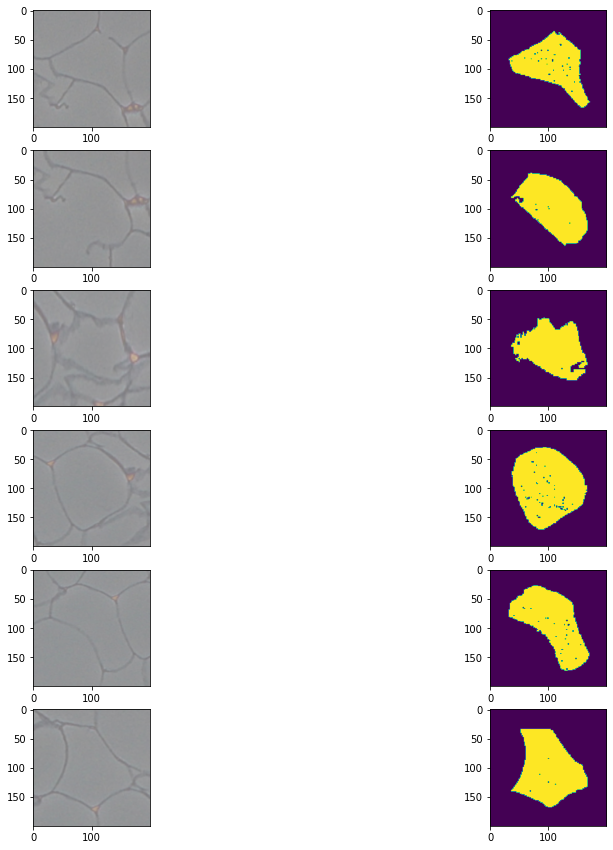

In [10]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, pred in zip(X_sample, Y_sample):
    ax = fig.add_subplot(n,2,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,2,i+1)
    ax.imshow(pred)
    i += 2
plt.show()

In [11]:
target_model.save(f'converted_model/{savedfile_name}')

INFO:tensorflow:Assets written to: converted_model/hr_5_3_0\assets
